## Data Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to dataset
csv_path = "../data/synthetic-it-call-center-tickets.csv"

# Load CSV into DataFrame
df = pd.read_csv(csv_path)

# Show basic info and first rows
print("DataFrame shape:", df.shape)
print("\nDataFrame dtypes:")
print(df.dtypes)

# Display first 5 rows
df.head()

DataFrame shape: (27602, 24)

DataFrame dtypes:
Unnamed: 0                       int64
number                          object
type                            object
date                            object
contact_type                    object
short_description               object
content                         object
category                        object
subcategory                     object
customer                        object
resolved_at                     object
close_notes                     object
agent                           object
reassigned_count                 int64
resolution_time                float64
issue/request                   object
software/system                 object
output                          object
assignment_group                object
item_id                          int64
role                            object
poor_close_notes                object
info_score_close_notes         float64
info_score_poor_close_notes    float64
dtype: object


,Unnamed: 0,number,type,date,contact_type,short_description,content,category,subcategory,customer,...,resolution_time,issue/request,software/system,output,assignment_group,item_id,role,poor_close_notes,info_score_close_notes,info_score_poor_close_notes
0,0,TASK0049212,Request,3/31/2021 14:13,Chat,Request for PostgreSQL upgrade to the latest v...,I would like to request an upgrade for our Pos...,SOFTWARE,INSTALLATION,"Morgan, Gregory",...,514.97000,PostgreSQL Upgrade Request,PostgreSQL,Software/System: PostgreSQL ; Issue/Request: P...,DBTED SUPPORT GROUP,7586,customer,See worknotes,0.8,0.0
1,1,INC0048604,Incident,3/27/2021 10:09,Email,ZTrend crashes unexpectedly when saving files,User reports ZTrend crashes unexpectedly when ...,SOFTWARE,ERROR,"Adams, Kenneth",...,876.01000,ZTrend Crashing When Saving Files,ZTrend,Software/System: ZTrend ; Issue/Request: ZTren...,APPLICATION SUPPORT,7287,agent,All set.,0.9,0.0
2,2,INC0034238,Incident,1/1/2021 15:41,Chat,Compatibility issues between CodeReview and ne...,Compatibility issues reported between CodeRevi...,SOFTWARE,MALFUNCTION,"Fischer, Noah",...,331.32000,CodeReview Compatibility Issue,CodeReview,Software/System: CodeReview ; Issue/Request: C...,APPLICATION SUPPORT,104,agent,Resolved,0.7,0.0
3,3,INC0068299,Incident,1/22/2021 6:45,Chat,Resolution steps for AirWave's disk space conc...,A user submitted a ticket regarding their Arub...,SOFTWARE,ERROR,"Martin, Mia",...,13934.15152,Insufficient disk space leading to incomplete ...,Aruba Networks AirWave,Software/System: Aruba Networks AirWave ; Issu...,NaN,12745,agent,Ticket closed. Issue addressed.,0.8,0.0
4,4,INC002060,Incident,1/6/2021 15:16,Self-service,Aruba Networks AirWave not working,I'm currently experiencing an issue with Aruba...,SOFTWARE,ERROR,"Stone, Isaiah",...,29771.07712,Error - SQLite3.DatabaseError: database disk i...,Aruba Networks AirWave,Software/System: Aruba Networks AirWave ; Issu...,TIER 2 TEAM,8683,customer,Issue resolved. User can access Aruba Networks...,0.9,0.1


In [3]:
subset = df[['short_description', 'content', 'category', 'subcategory', 'software/system']].reset_index()

In [4]:
subset

,index,short_description,content,category,subcategory,software/system
0,0,Request for PostgreSQL upgrade to the latest v...,I would like to request an upgrade for our Pos...,SOFTWARE,INSTALLATION,PostgreSQL
1,1,ZTrend crashes unexpectedly when saving files,User reports ZTrend crashes unexpectedly when ...,SOFTWARE,ERROR,ZTrend
2,2,Compatibility issues between CodeReview and ne...,Compatibility issues reported between CodeRevi...,SOFTWARE,MALFUNCTION,CodeReview
3,3,Resolution steps for AirWave's disk space conc...,A user submitted a ticket regarding their Arub...,SOFTWARE,ERROR,Aruba Networks AirWave
4,4,Aruba Networks AirWave not working,I'm currently experiencing an issue with Aruba...,SOFTWARE,ERROR,Aruba Networks AirWave
...,...,...,...,...,...,...
27597,27597,Assessment and replacement of broken PIV card,Received report of a broken PIV card from user...,PIV CARD,ISSUE,Piv Card
27598,27598,Request for PIV card replacement due to damage,My current PIV card is damaged and no longer f...,PIV CARD,REPLACEMENT,Piv Card
27599,27599,PIV card replacement request due to card damage,Received request for replacement of damaged PI...,PIV CARD,REPLACEMENT,Piv Card
27600,27600,PIV Card is physically damaged and not working,My PIV card is broken and no longer being reco...,PIV CARD,ISSUE,Piv Card


## Preprocessing

In [ ]:
def clean_series(series: pd.Series) -> pd.Series:
    """
    Funzione di pulizia vettorizzata:
    - Normalizza gli spazi.
    """
    # Gestisce NaN/None e li converte in stringa vuota
    s_cleaned = series.fillna('')
    
    # Applica tutte le trasformazioni
    s_cleaned = s_cleaned.str.replace(r'\s+', ' ', regex=True)
    s_cleaned = s_cleaned.str.strip()
    
    return s_cleaned

def preprocess_batch(df_batch: pd.DataFrame,
                     id_column: str = None) -> pd.DataFrame:
    """
    Preprocessa un batch di ticket e restituisce un DataFrame 
    con le colonne 'id' e 'text'.
    
    Parametri:
    - df_batch: Il DataFrame contenente i dati dei ticket.
    - id_column: (Opzionale) Il nome della colonna in df_batch 
                   che contiene gli ID. Se non fornita, 
                   verrà utilizzato l'indice del df_batch.
    """
    
    # Clean each series
    s_cat = clean_series(
        df_batch['category'] if 'category' in df_batch else pd.Series(dtype=str)
    )
    s_sub = clean_series(
        df_batch['subcategory'] if 'subcategory' in df_batch else pd.Series(dtype=str)
    )
    s_desc = clean_series(
        df_batch['short_description'] if 'short_description' in df_batch else pd.Series(dtype=str)
    )
    s_cont = clean_series(
        df_batch['content'] if 'content' in df_batch else pd.Series(dtype=str)
    )
    s_sw = clean_series(
        df_batch['software/system'] if 'software/system' in df_batch else pd.Series(dtype=str)
    )

    # Concatena le Series (Vettorizzato)
    final_text_series = (
        "category: " + s_cat + " " +  s_sub + " | " +
        "software: " + s_sw + " | " +
        "title: " + s_desc + " | " +
        "content: " + s_cont
    )
    
    # Estrazione ID
    id_series = None
    if id_column:
        if id_column in df_batch.columns:
            id_series = df_batch[id_column]
        else:
            print(f"Warning: id_column '{id_column}' not found.")
            id_series = df_batch.index
    else:
        # Se non è specificato nessun id_column, usa l'indice
        id_series = df_batch.index
        
    # Creazione DataFrame Finale
    output_df = pd.DataFrame({
        'id': id_series.values,
        'text': final_text_series.values
    })
    
    return output_df

In [6]:
processed_data = preprocess_batch(subset, 'index')

## Sentence embedding

In [ ]:
from sentence_transformers import SentenceTransformer

#  Pretrained models from https://www.sbert.net/docs/sentence_transformer/pretrained_models.html
MODEL = 'multi-qa-mpnet-base-dot-v1'

# Carica un modello
model = SentenceTransformer(MODEL, device='cpu')

sentences = processed_data['text'].tolist()

Model's max token limit: 512

Max number of tokens per sentence: 195


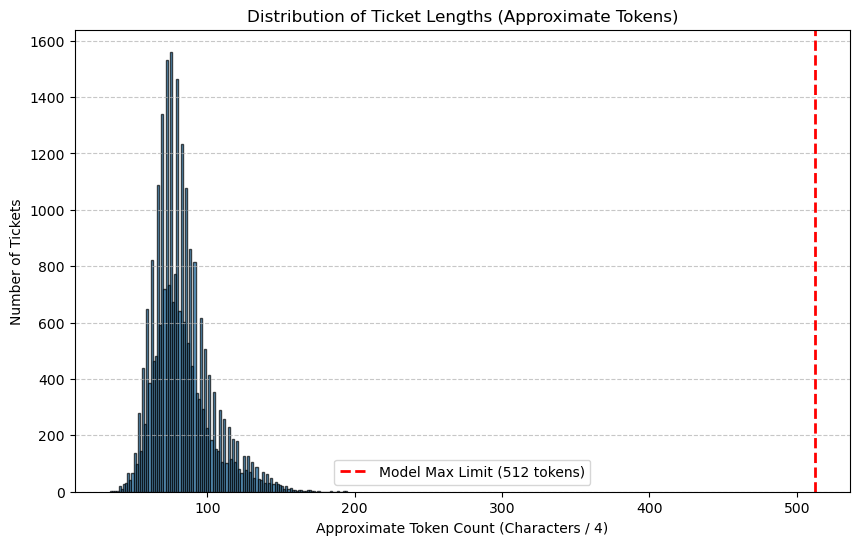

In [ ]:
# Get the tokenizer
tokenizer = model.tokenizer

# Get the model's maximum token limit
model_max_limit = model.max_seq_length
print(f"Model's max token limit: {model_max_limit}")

token_counts = []
for i, ticket_text in enumerate(sentences): 
    tokenized_output = tokenizer(
        ticket_text, 
        add_special_tokens=True
    )
    
    current_token_count = len(tokenized_output['input_ids'])
    
    token_counts.append(current_token_count)

print(f"Max number of tokens per sentence: {max(token_counts)}")

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins='auto', edgecolor='black', alpha=0.7)

# Add a vertical line for the model's max limit
plt.axvline(
    model_max_limit, 
    color='red', 
    linestyle='--', 
    linewidth=2, 
    label=f'Model Max Limit ({model_max_limit} tokens)'
)

# Add labels and title
plt.title('Distribution of Ticket Lengths')
plt.xlabel('Token Count')
plt.ylabel('Number of Tickets')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [17]:
import pickle
import os

embedding_cache_path= f"../data/{MODEL}/embeddings.pkl"

if os.path.exists(embedding_cache_path):
    print("Load pre-computed embeddings from disk")
    with open(embedding_cache_path, "rb") as fIn:
        embeddings = pickle.load(fIn)
else:
    print("Encoding embeddings...")
    embeddings = model.encode(sentences, show_progress_bar=True)

    with open(embedding_cache_path, "wb") as fOut:
        pickle.dump(embeddings, fOut)

Load pre-computed embeddings from disk


## FAISS

In [18]:
import faiss
import numpy as np

embedding_size = embeddings.shape[1]  # Size of embeddings
num_tickets = embeddings.shape[0]

print(f"Embeddings size: {embedding_size}")
print(f"Number of tickets: {num_tickets}")

Embeddings size: 768
Number of tickets: 27602


We will use an exact match if we have a small dataset and an approximate nearest neighborn for larger datasets (faster, but less accurate)

In [ ]:
# Defining our FAISS index
# If we use a model trained on inner product (dot) we need IP, otherwise L2
# For more infos: https://github.com/facebookresearch/faiss/wiki/Guidelines-to-choose-an-index

# For the inner product, we need to normalize vectors to unit length
embeddings = embeddings / np.linalg.norm(embeddings, axis=1)[:, None]

if num_tickets < 10**6:
  print("Using Flat Exact Index")
  index = faiss.IndexFlatIP(embedding_size)
  index.add(embeddings)
else:
  print("Using IVF Flat Index")
  # Number of clusters used for faiss. Select a value 4*sqrt(N) to 16*sqrt(N)
  n_clusters = int(4*np.sqrt(num_tickets))
  print(f" - Number of clusters: {n_clusters}")

  # We use Inner Product (dot-product) as Index. 
  # We will normalize our vectors to unit length, then is Inner Product equal to cosine similarity
  quantizer = faiss.IndexFlatIP(embedding_size)
  index = faiss.IndexIVFFlat(quantizer, embedding_size, n_clusters, faiss.METRIC_INNER_PRODUCT)

  # Number of clusters to explorer at search time. We will search for nearest neighbors in 3 clusters.
  index.nprobe = 3
  
  # Then we train the index to find a suitable clustering
  index.train(embeddings)

  # Finally we add all embeddings to the index
  index.add(embeddings)

Using Flat Exact Index


In [ ]:
import time

top_k_hits = 10

while True:
    inp_question = input("Please enter a question: ")

    start_time = time.time()
    question_embedding = model.encode(inp_question)

    # FAISS works with inner product.
    question_embedding = question_embedding / np.linalg.norm(question_embedding)
    question_embedding = np.expand_dims(question_embedding, axis=0)

    # Search in FAISS. It returns a matrix with distances and corpus ids.
    distances, corpus_ids = index.search(question_embedding, top_k_hits)

    # We extract corpus ids and scores for the first query
    hits = [{"corpus_id": id, "score": score} for id, score in zip(corpus_ids[0], distances[0])]
    hits = sorted(hits, key=lambda x: x["score"], reverse=True)
    end_time = time.time()

    print("Input question:", inp_question)
    print(f"Results (after {end_time - start_time:.3f} seconds):")
    for hit in hits[0:top_k_hits]:
        print("\t{:.3f}\t{}".format(hit["score"], sentences[hit["corpus_id"]]))


Input question: problems with java
Results (after 0.065 seconds):
	0.550	category: software error | software: cisco meraki | title: cisco meraki problem | content: i m having a problem with my cisco meraki software. whenever i try to do something not sure exactly what triggers it i m getting an error message that says error: object of type java.lang.string cannot be cast to java.lang.integer at line 245. i ve tried clearing my browser s cookies and cache and even restarted the browser but the issue still won t go away. can you please help me fix this
	0.548	category: software error | software: google workspace | title: google workspace is not working error: object of type java.lang.string cannot be cast to java.lang.integer at line 245 | content: i m having trouble with google workspace and keep getting an error message that says error: object of type java.lang.string cannot be cast to java.lang.integer at line 245. i ve already tried clearing my cookies and cache and even restarted my

KeyboardInterrupt: Interrupted by user